In [ ]:
!wget https://www.dropbox.com/s/8imadi526kiz4uw/Dataset.zip?dl=0

--2021-12-09 04:26:26--  https://www.dropbox.com/s/8imadi526kiz4uw/Dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/8imadi526kiz4uw/Dataset.zip [following]
--2021-12-09 04:26:26--  https://www.dropbox.com/s/raw/8imadi526kiz4uw/Dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca240240c63512c314ece4b66a9.dl.dropboxusercontent.com/cd/0/inline/BbeMM70R4sWB7HKr-R5U8lZDrYQUIEee5t1FpLrvSeRY1omDXfDGZskH-il9fxCZTQ3sFEYy3fVqE83j15qTxeRdz_gxVV1-7KNO8aKFxxZpxYbqFlMuh6y5QMUlaArFWgXoxQ00DBZGvcabj4lOx-H6/file# [following]
--2021-12-09 04:26:26--  https://uca240240c63512c314ece4b66a9.dl.dropboxusercontent.com/cd/0/inline/BbeMM70R4sWB7HKr-R5U8lZDrYQUIEee5t1FpLrvSeRY1omDXfDGZskH-il9fxCZTQ3sFEYy3fVqE83j15qTxeRd

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
IMAGE_SIZE= 256
BATCH_SIZE= 32
EPOCHS=50

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
        "Dataset",
        shuffle=True,
        image_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE)

Found 3000 files belonging to 3 classes.


In [ ]:
class_names=dataset.class_names
class_names

['Covid', 'Normal', 'PNEUMONIA']

In [ ]:
len(dataset)

94

In [ ]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)      # each image is 256*256 with 3 rgb channels and with 32 images
    print(label_batch.numpy())    # we have 3 classes, each number represents to each class 
    print(image_batch)            # represents a tensor of the image

(32, 256, 256, 3)
[0 0 1 2 1 0 0 0 1 2 1 2 1 1 0 0 2 1 0 2 2 1 0 1 0 1 0 0 1 0 0 2]
tf.Tensor(
[[[[ 20.251953   20.251953   20.251953 ]
   [ 20.251953   20.251953   20.251953 ]
   [ 20.251953   20.251953   20.251953 ]
   ...
   [ 26.251953   26.251953   26.251953 ]
   [ 26.251953   26.251953   26.251953 ]
   [ 27.091038   27.091038   27.091038 ]]

  [[ 22.769207   22.769207   22.769207 ]
   [ 23.         23.         23.       ]
   [ 23.         23.         23.       ]
   ...
   [ 29.251953   29.251953   29.251953 ]
   [ 29.251953   29.251953   29.251953 ]
   [ 29.251953   29.251953   29.251953 ]]

  [[ 22.01345    22.01345    22.01345  ]
   [ 22.265957   22.265957   22.265957 ]
   [ 22.580078   22.580078   22.580078 ]
   ...
   [ 30.         30.         30.       ]
   [ 30.         30.         30.       ]
   [ 30.         30.         30.       ]]

  ...

  [[ 34.34939    34.34939    34.34939  ]
   [ 33.07617    33.07617    33.07617  ]
   [ 30.916569   30.916569   30.916569 ]
   ...
   

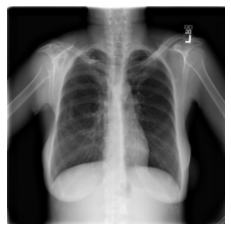

In [ ]:
for image_batch,label_batch in dataset.take(1):
    
    plt.imshow(image_batch[0].numpy().astype("int64"))#converting to int since numbers in floating points.
    plt.axis('off')

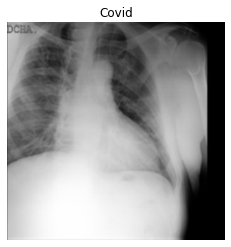

In [ ]:
for image_batch,label_batch in dataset.take(1):
    
    plt.imshow(image_batch[0].numpy().astype("int64"))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')

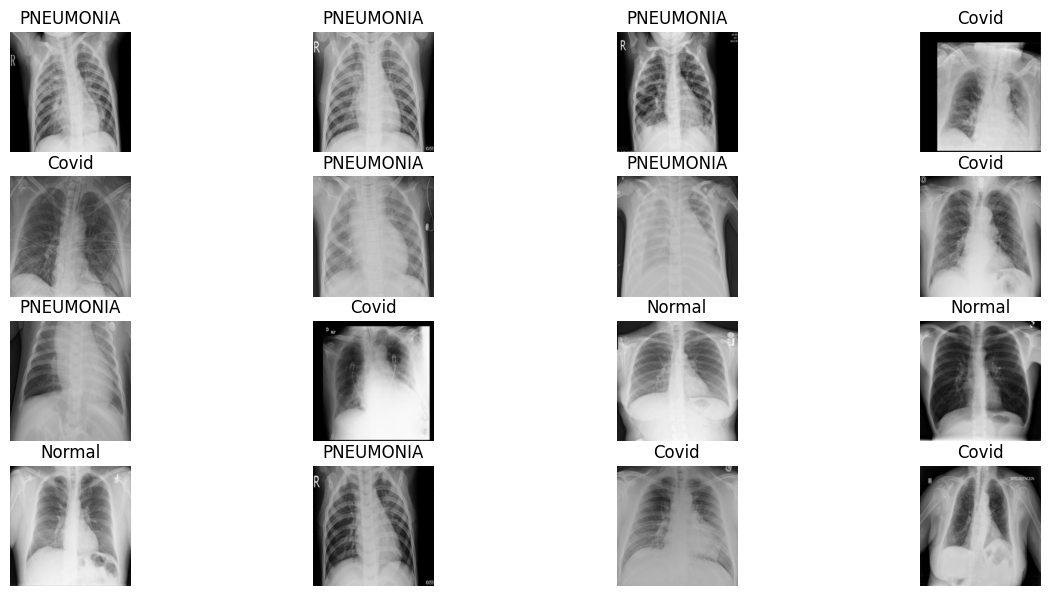

In [ ]:
plt.figure(figsize=(15,15),dpi=100)
for image_batch,label_batch in dataset.take(1):
    for i in range(16):
        plt.subplot(8,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("int64"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [ ]:
len(dataset)

94

In [ ]:
#train test split

In [ ]:
def dataset_partitions_tf(ds, train_split=0.8, val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=42)
    train_size=int(train_split * ds_size)
    val_size=int(val_split*ds_size)
    train=ds.take(train_size)
    val=ds.skip(train_size).take(val_size)
    test=ds.skip(train_size).skip(val_size)
    
    return train,val,test

In [ ]:
train,val,test=dataset_partitions_tf(dataset)

In [ ]:
print(len(train))
print(len(val))
print(len(test))

75
9
10


In [ ]:
train=train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val=val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test=test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
#data Resizing and Rescaling

In [ ]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),  #Resizing every image
    layers.experimental.preprocessing.Rescaling(1.0/255)  #Rescaling 
    
])

In [ ]:
#Horizontal and vertical Flip

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
CHANNELS=3
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model= models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(512,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(1024,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(2048,activation='relu'),
    layers.Dense(n_classes,activation='softmax')    #Softmax will normalize the probability of your classes

])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 128)        0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
hist = model.fit(
train,
epochs=EPOCHS,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val)

Epoch 1/50
75/75 [==============================] - 54s 521ms/step - loss: 1.3259 - accuracy: 0.3984 - val_loss: 0.7716 - val_accuracy: 0.5451
Epoch 2/50
75/75 [==============================] - 27s 359ms/step - loss: 0.7600 - accuracy: 0.6129 - val_loss: 0.7088 - val_accuracy: 0.6944
Epoch 3/50
75/75 [==============================] - 27s 358ms/step - loss: 0.6719 - accuracy: 0.6710 - val_loss: 0.7336 - val_accuracy: 0.5938
Epoch 4/50
75/75 [==============================] - 27s 358ms/step - loss: 0.6699 - accuracy: 0.6526 - val_loss: 0.6591 - val_accuracy: 0.6701
Epoch 5/50
75/75 [==============================] - 27s 358ms/step - loss: 0.6217 - accuracy: 0.6952 - val_loss: 0.6111 - val_accuracy: 0.7292
Epoch 6/50
75/75 [==============================] - 27s 358ms/step - loss: 0.6160 - accuracy: 0.7166 - val_loss: 0.6007 - val_accuracy: 0.7361
Epoch 7/50
75/75 [==============================] - 27s 358ms/step - loss: 0.6132 - accuracy: 0.7099 - val_loss: 0.6055 - val_accuracy: 0.7361

In [ ]:
scores=model.evaluate(test)

10/10 [==============================] - 8s 111ms/step - loss: 0.2518 - accuracy: 0.9031


In [ ]:
hist.params

{'epochs': 50, 'steps': 75, 'verbose': 1}

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
hist.history['accuracy']

[0.4995819330215454,
 0.6584448218345642,
 0.6831103563308716,
 0.6801839470863342,
 0.7094481587409973,
 0.7102842926979065,
 0.7412207126617432,
 0.77173912525177,
 0.7466555237770081,
 0.7755016684532166,
 0.7746655344963074,
 0.795568585395813,
 0.8118728995323181,
 0.8198160529136658,
 0.7905518412590027,
 0.7993311285972595,
 0.8260869383811951,
 0.8177257776260376,
 0.8515886068344116,
 0.8398829698562622,
 0.8549330830574036,
 0.8478260636329651,
 0.8524247407913208,
 0.8666387796401978,
 0.864130437374115,
 0.8754180669784546,
 0.8804348111152649,
 0.8804348111152649,
 0.8795986771583557,
 0.8837792873382568,
 0.8896321058273315,
 0.9030100107192993,
 0.8850334286689758,
 0.8925585150718689,
 0.8896321058273315,
 0.9025919437408447,
 0.9038461446762085,
 0.8959029912948608,
 0.8846153616905212,
 0.9025919437408447,
 0.89673912525177,
 0.907608687877655,
 0.9193143844604492,
 0.9051003456115723,
 0.9159699082374573,
 0.9017558693885803,
 0.9264214038848877,
 0.907608687877655,


In [ ]:
acc= hist.history['accuracy']
val_acc= hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

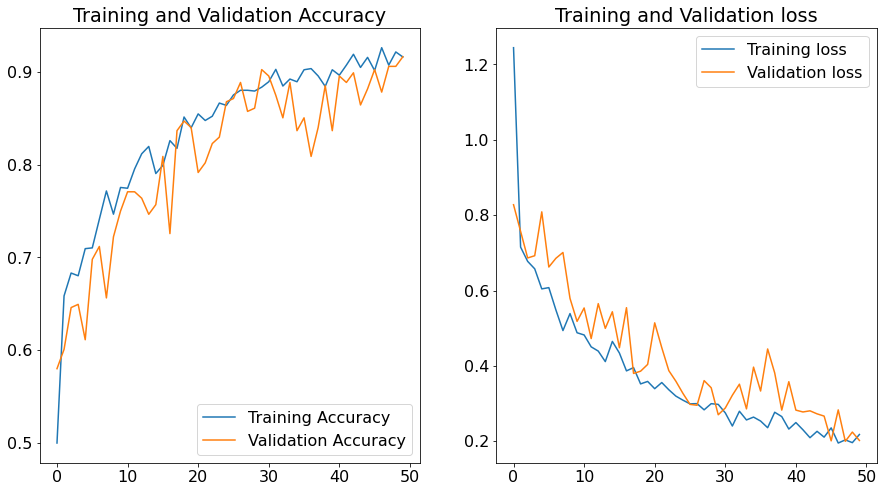

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

In [ ]:
predictions = model.predict(test)
predictions=[np.argmax(x) for x in predictions]
predictions[:15]


[2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1]

In [ ]:
y=np.concatenate([y for x,y in test],axis=0)
y

array([2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 1,
       1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 2, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0,
       2, 1, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 2, 0, 2, 2, 2, 1, 1, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       0, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0,
       0, 1, 0, 2, 2, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       0, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 0, 2, 0, 2, 1, 2, 1,
       2, 0, 0, 0, 1, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0,
       2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1,
       1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1,

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams.update({'font.size': 16})
predictions = model.predict(train)
predictions = [np.argmax(x) for x in predictions]
predictions[:15]
y=np.concatenate([y for x,y in train],axis=0)
cm = confusion_matrix(y, predictions)
cm = pd.DataFrame(cm, index = ['0', '1', '2'], columns = ['0', '1', '2'])
cm
class_names = ['COVID','NORMAL','VIRAL PNEUMONIA']
def plot_confusion_matrix (cm):
    plt.figure(figsize = (10,10))
    sns.heatmap(
        cm, 
        cmap = 'Blues', 
        linecolor = 'black', 
        linewidth = 1, 
        annot = True, 
        fmt = '', 
        xticklabels = class_names, 
        yticklabels = class_names)
    
plot_confusion_matrix(cm)

first image to predict
first images actual label: VIRAL PNEUMONIA
VIRAL PNEUMONIA


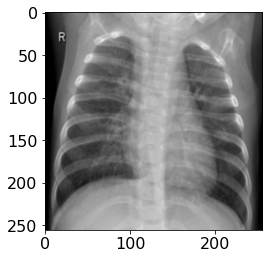

In [ ]:
for images_batch,labels_batch in test.take(1):
    first_image=images_batch[0].numpy().astype('int32')
    first_label=labels_batch[0].numpy()
    
    print('first image to predict')
    plt.imshow(first_image)
    print('first images actual label:', class_names[first_label])
    
    
    batch_predictions=model.predict(images_batch)
    print(class_names[np.argmax(batch_predictions[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

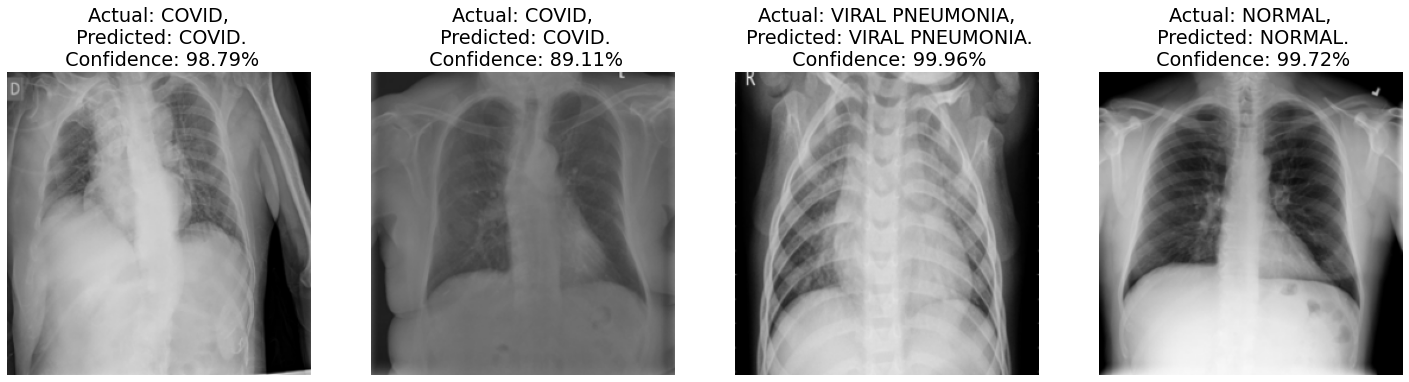

In [ ]:

plt.figure(figsize=(25, 25))
for images, labels in test.take(1):
    for i in range(4):
        ax = plt.subplot(1, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")